# Titanics EDA 

#### Import standard packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Read in the training data

In [2]:
raw_data = pd.read_csv('titanic_data.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

### Understanding our data


In [3]:
#first lets look at how much data we have
raw_data.shape

(891, 12)

In [4]:
# we can see this dataset has 892 observations and 12 features
# now lets see at how complete the data is
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# there are missing values in the age, cabin, and embarked features

#### What are the variables?

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
raw_data.nunique() 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Just looking at number of unique values survived, pclass, sex,
and embarked are likely to be catagorical variables


In [8]:
# Make a new data frame so I don't screw up the original
data = raw_data.copy()

### Looking at data distributions

##### How many of survived?

In [9]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# we have a reasonably balanced dataset in terms of the response variable

#### How many males versus females?

In [11]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
# is there any correlation between Sex and survival?
table = pd.pivot_table(data, index=['Sex'], values=['PassengerId'], columns=['Survived'], aggfunc='count')
table

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

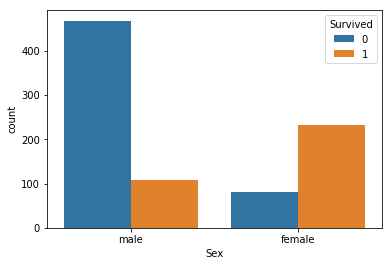

In [13]:
ax = sns.countplot(x="Sex", hue='Survived', data=data)

In [14]:
# we can see that gender is a good predictor of survival

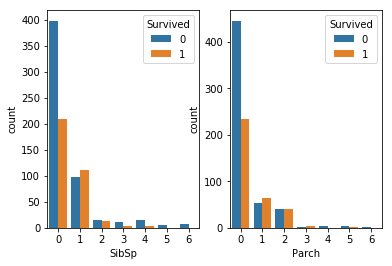

In [15]:
# we can see looking ar sibsp and parch that people without family members are more likely to have died
fig, ax = plt.subplots(1, 2, sharex=True)
s1 = sns.countplot(x="SibSp", hue='Survived', data=data, ax=ax[0])
s1.legend(loc='upper right', title='Survived');
s0 = sns.countplot(x="Parch", hue='Survived', data=data, ax=ax[1])
s0.legend(loc='upper right',title='Survived');

3    491
1    216
2    184
Name: Pclass, dtype: int64


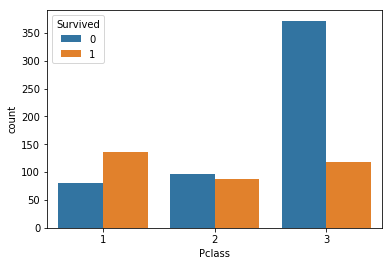

In [16]:
# we can also see 3rd class ticket holders were more likely to have died
print(data['Pclass'].value_counts())
ax = sns.countplot(x="Pclass", hue='Survived', data=data)

#### What is the distribution of Fares?

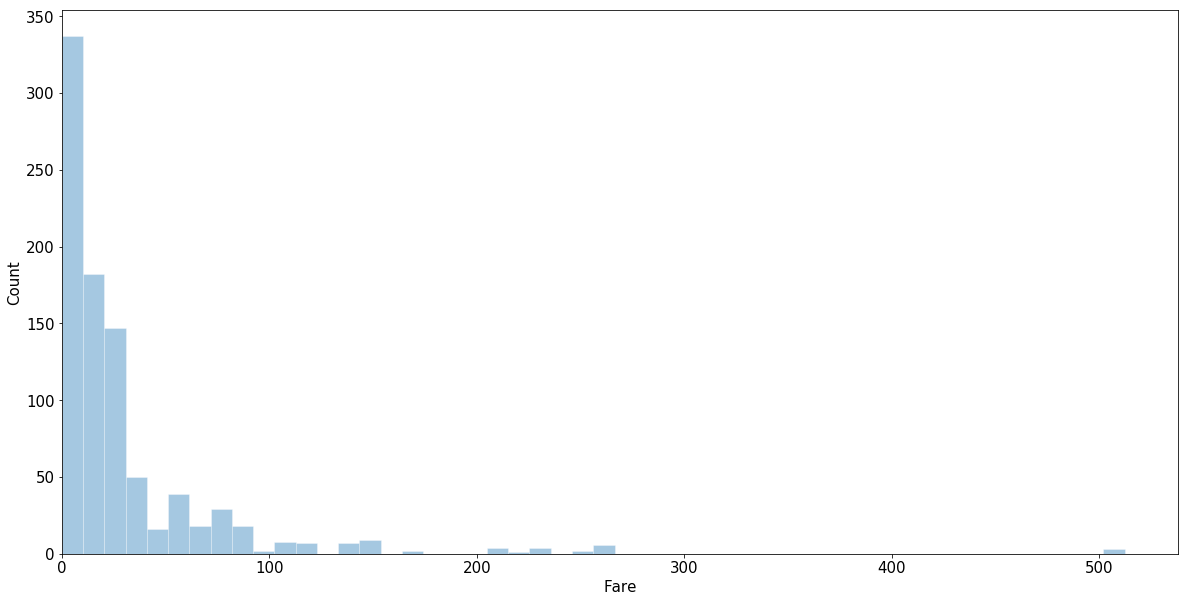

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(data["Fare"], bins = 50, kde = False,
             hist_kws=dict(edgecolor="w", linewidth=.8))
ax.set_xlabel('Fare',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim(0)
plt.show();


We have a very skewed distribution, can we see a difference between between survived and died?

/Users/jon/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


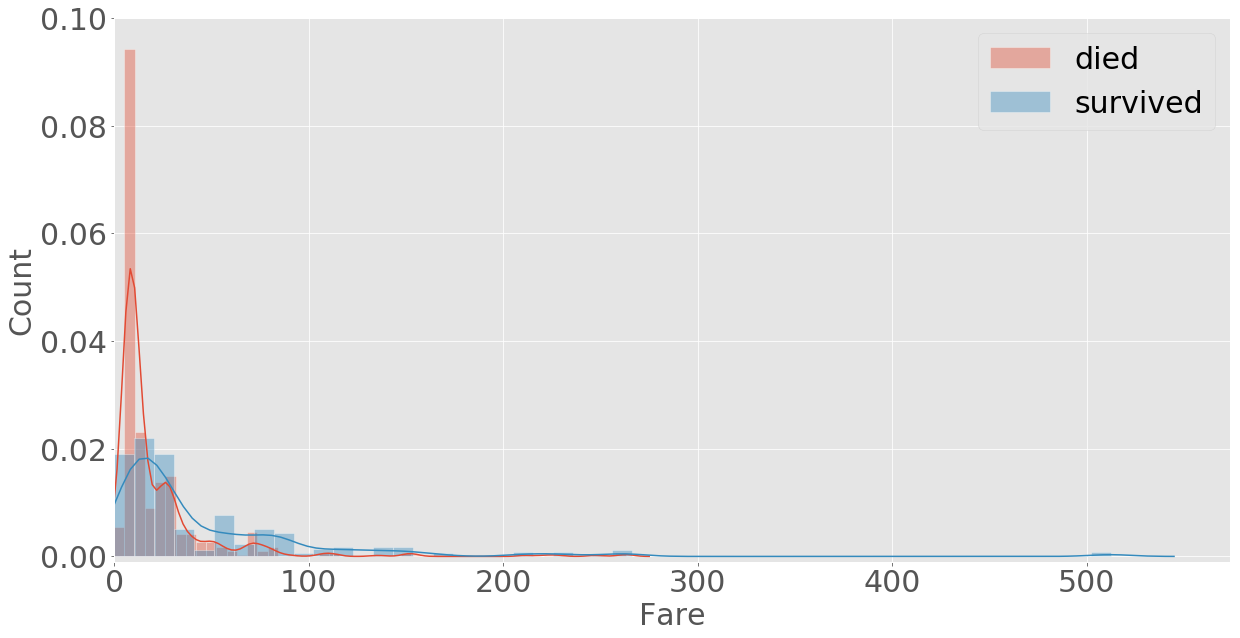

In [18]:
plt.style.use('ggplot')
# plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(data.loc[data['Survived'] == 0,"Fare"],
             bins = 50, label='died',
             hist_kws=dict(edgecolor="w", linewidth=.8))
sns.distplot(data.loc[data['Survived'] == 1,"Fare"],
             bins = 50, label='survived',
             hist_kws=dict(edgecolor="w", linewidth=.8))
ax.set_xlabel('Fare',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
ax.tick_params(labelsize=30)
ax.set_xlim(0)
ax.set_ylim([-0.001, 0.1])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=30)
plt.show();

In [19]:
# we can see lowers fares are more likely to have not survived

### cross correlation between variables

In [20]:

corr = data[
    ['Fare', 'Pclass', 'Age', 
     'Parch','SibSp', 'Survived']].corr()

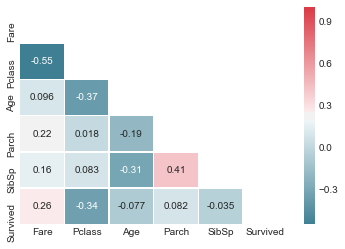

In [21]:

# plt.style.use('ggplot')
plt.style.use('seaborn-white')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap = cmap, mask=mask, linewidths=.5, annot=True)

In [22]:
"""
we can see Parch and SibSp are correlated, so it may be worth engineering a new feature 
to combine the two. 

Fare and class correlate the most with survival of the current features. We also know that Sex does, as well, from above.
"""

'\nwe can see Parch and SibSp are correlated, so it may be worth engineering a new feature \nto combine the two. \n\nFare and class correlate the most with survival of the current features. We also know that Sex does, as well, from above.\n'

## feature engineering

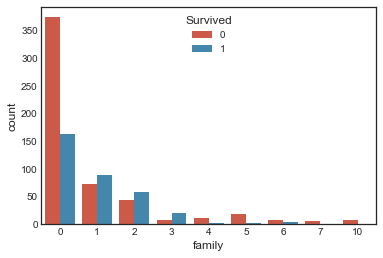

In [23]:
#engineer a new feature called family
data['family']  = data['Parch'] + data['SibSp']
sns.countplot(x="family", hue='Survived', data=data);
# this seems to be better than Parch and Sibsp were alone

In [24]:
# whilst the name feature on it's own isn't too useful, we can extract useful information from it such as title
# this would give information on marriage status, gender, age etc
data['Title'] = data.Name.str.extract(
    ' ([A-Za-z]+)\.', expand=False)

In [25]:
# lets look at the distribution of the feature we created
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Lady          1
Jonkheer      1
Sir           1
Countess      1
Ms            1
Capt          1
Mme           1
Name: Title, dtype: int64

In [26]:
# many of the titles are rare, so lets put them in their own rare catagory
titles = {
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
}

# extract titles
data['Title'].replace(titles, inplace=True)

         PassengerId     
Survived           0    1
Title                    
Master            17   23
Miss              55  130
Mr               436   81
Mrs               26  100
Rare              15    8


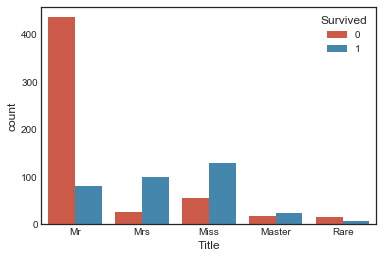

In [27]:
# lets see if our new feature is at all usefull
plt.style.use('seaborn-white')
table = pd.pivot_table(data, index=['Title'], values=['PassengerId'], columns=['Survived'], aggfunc='count')
print(table)
sns.countplot(x="Title", hue='Survived', data=data);

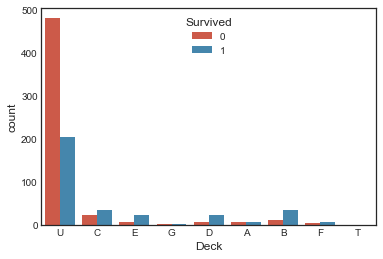

In [28]:
# we can also extract a feature called deck from the cabin feature
# each cabin entry has a letter at the beginning , which is the floor
# we can see there are differences in the survival rates on different floors
data['Cabin'].fillna('U', inplace=True)
data['Deck'] = data['Cabin'].apply(lambda x: x[0])
sns.countplot(x="Deck", hue='Survived', data=data);